In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.shape

(768, 9)

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### NAN's

In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### ERROR detection

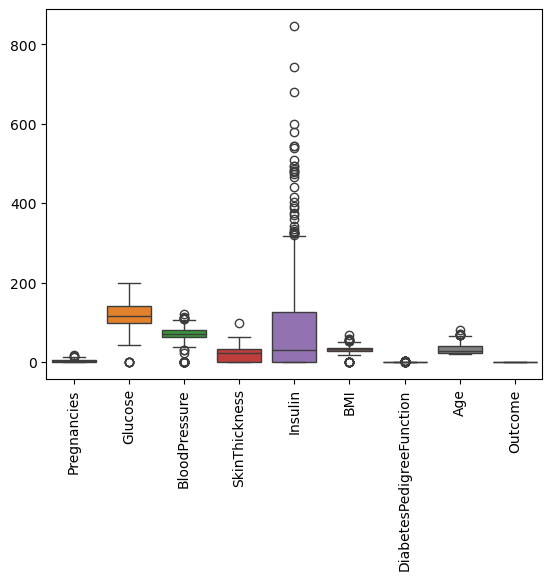

In [15]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [18]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [22]:
for c in cols:
    print(c)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [26]:
for c in cols:
    print(df[c])

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64
0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64
0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64
0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64
0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64
0      0.627
1      0.351
2      0.6

In [27]:
for c in cols :
    sk = df[c].skew().round()
    if sk ==0 or sk == -0:
        print(c, " : Normal Distribution")
    else: 
        print(c, ": Skewed Distribution")

Pregnancies : Skewed Distribution
Glucose  : Normal Distribution
BloodPressure : Skewed Distribution
SkinThickness  : Normal Distribution
Insulin : Skewed Distribution
BMI  : Normal Distribution
DiabetesPedigreeFunction : Skewed Distribution
Age : Skewed Distribution


In [28]:
for c in cols :
    sk = df[c].skew().round()
    if sk ==0 or sk == -0:
        m = df[c].mean()
        s = df[c].std()
        lowerlimit = m - 3*s
        upperlimit = m + 3*s
        df[c] = df[c].map(lambda x : lowerlimit if x < lowerlimit else upperlimit if x > upperlimit else x)
    else: 
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        df[c] = df[c].map(lambda x : lower if x < lower else upper if x > upper else x)    

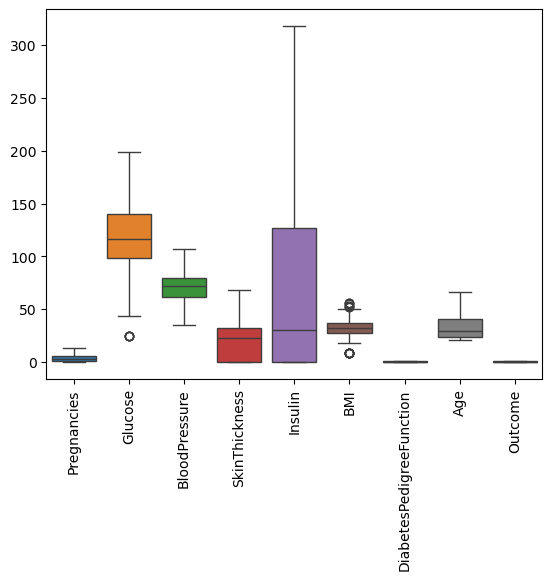

In [29]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

### Encoding

In [39]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

### Imbalance

In [41]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

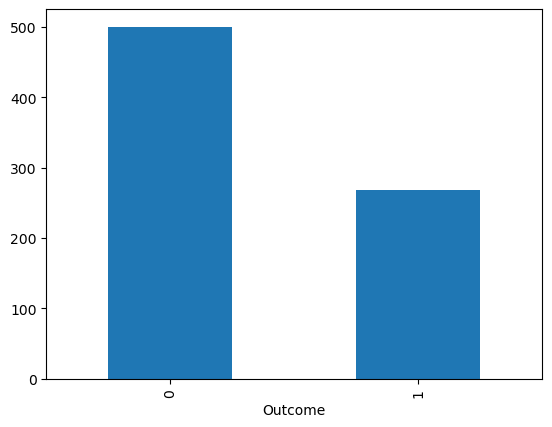

In [43]:
df["Outcome"].value_counts().plot(kind = "bar")

In [45]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
ros = RandomOverSampler()

In [50]:
ros

RandomOverSampler()

In [51]:
x = df.drop("Outcome", axis = 1)

In [52]:
y = df["Outcome"]

In [53]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [54]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [55]:
x_ros , y_ros = ros.fit_resample(x,y)

In [56]:
x.shape

(768, 8)

In [57]:
x_ros.shape

(1000, 8)

In [58]:
y_ros.shape

(1000,)

In [59]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [60]:
y_ros.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

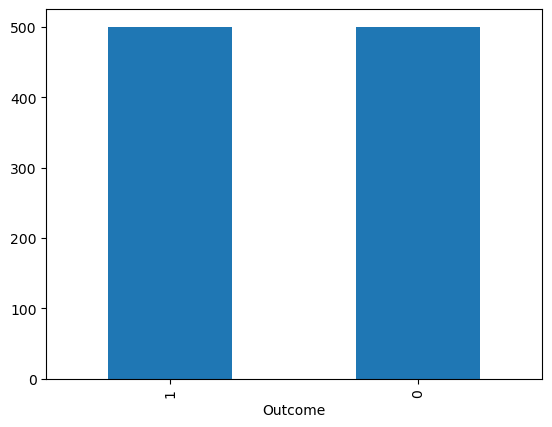

In [61]:
y_ros.value_counts().plot(kind = "bar")

### Splitting

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test,y_train, y_test = train_test_split(x_ros,y_ros,test_size = 0.20, random_state = 42)

In [65]:
x.shape, x_train.shape, x_test.shape

((768, 8), (800, 8), (200, 8))

In [67]:
y.shape, y_train.shape, y_test.shape

((768,), (800,), (200,))

### Creating Model

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtclass = DecisionTreeClassifier()

In [91]:
dtclass

DecisionTreeClassifier()

In [93]:
dtclass.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
dtclass.score(x_test, y_test)

0.825

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [103]:
knn = KNeighborsClassifier()

In [105]:
sv_model = SVC()

In [107]:
dtree = DecisionTreeClassifier()

In [109]:
models = [knn , sv_model, dtree ]

In [111]:
models

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [113]:
for m in models:
    m.fit(x_train,y_train)
    sc = m.score(x_test, y_test)
    print(m, end = "==>")
    print(sc)

KNeighborsClassifier()==>0.75
SVC()==>0.76
DecisionTreeClassifier()==>0.815


### Corss Validation

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
from sklearn.model_selection import cross_val_score

In [150]:
dtree1 = DecisionTreeClassifier()

In [152]:
dtree1

DecisionTreeClassifier()

In [154]:
score = cross_val_score (dtree1, x_train, y_train, cv=20, n_jobs = -1 )

In [156]:
score

array([0.9  , 0.85 , 0.775, 0.825, 0.8  , 0.875, 0.9  , 0.875, 0.8  ,
       0.75 , 0.8  , 0.85 , 0.95 , 0.875, 0.825, 0.825, 0.875, 0.85 ,
       0.85 , 0.825])

In [158]:
score.mean()

0.84375